In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import wavfile
import mpmath

In [1]:
#-- Create the list of musical notes

scale=[] 
for k in range(35, 65): 
    note=440*2**((k-49)/12)
    if k%12 != 0 and k%12 != 2 and k%12 != 5 and k%12 != 7 and k%12 != 10:
        scale.append(note) # add musical note (skip half tones)
n_notes = len(scale) # number of musical notes

print(n_notes)

18


In [17]:
#-- Generate the data

n = 500
sigma = 0.5
min_t = 400000
max_t = 400020

def create_data(f, nobs, min_t, max_t, sigma):
    z_real = []
    z_imag = []
    z_modulus = []
    incr_t = (max_t - min_t) / nobs
    for t in np.arange(min_t, max_t, incr_t):   
        if f == 'Zeta':
            z = mpmath.zeta(complex(sigma, t))
        elif f == 'Eta':
            z = mpmath.altzeta(complex(sigma, t))
        z_real.append(float(z.real))
        z_imag.append(float(z.imag))
        modulus = np.sqrt(z.real*z.real + z.imag*z.imag)
        z_modulus.append(float(modulus))
    return(z_real, z_imag, z_modulus)

(z_real, z_imag, z_modulus) = create_data('Eta', n, min_t, max_t, sigma) 

size = len(z_real) # should be identical to nobs
x = np.arange(size)

# frequency of each note     
y = z_real    
min = np.min(y)
max = np.max(y)
yf = 0.999*n_notes*(y-min)/(max-min) 
 
# duration of each note
z = z_imag  
min = np.min(z)
max = np.max(z)
zf = 0.1 + 0.4*(z-min)/(max-min) 

# volume of each note
v = z_modulus 
min = np.min(v)
max = np.max(v)
vf = 500 + 2000 * (1 - (v - min) / (max - min))

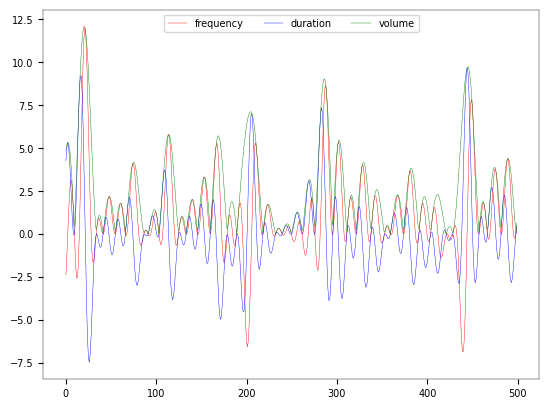

In [22]:
#-- plot data

mpl.rcParams['axes.linewidth'] = 0.3
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7) 
plt.rcParams['axes.linewidth'] = 0.1
plt.plot(x, y, color='red', linewidth = 0.3)
plt.plot(x, z, color='blue', linewidth = 0.3)
plt.plot(x, v, color='green', linewidth = 0.3)
plt.legend(['frequency','duration','volume'], fontsize="7", 
    loc ="upper center", ncol=3)
plt.show()

In [ ]:
#-- Turn the data into music

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration))
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

wave=[]
for t in x: # loop over dataset observations, create one note per observation
    note = int(yf[t])
    duration = zf[t]
    frequency = scale[note]    
    volume = vf[t]  ## 2048
    new_wave = get_sine_wave(frequency, duration = zf[t], amplitude = vf[t])
    wave = np.concatenate((wave,new_wave))
wavfile.write('sound.wav', rate=44100, data=wave.astype(np.int16))